In [ ]:
!unzip raw_audio-20251212T150619Z-3-001.zip -d raw_audio
!ls raw_audio


Archive:  raw_audio-20251212T150619Z-3-001.zip
  inflating: raw_audio/raw_audio/Speaker4_09.m4a  
  inflating: raw_audio/raw_audio/Speaker2_07.m4a  
  inflating: raw_audio/raw_audio/Speaker2_05.m4a  
  inflating: raw_audio/raw_audio/Speaker0_00.m4a  
  inflating: raw_audio/raw_audio/Speaker1_00.m4a  
  inflating: raw_audio/raw_audio/Speaker1_02.m4a  
  inflating: raw_audio/raw_audio/Speaker2_00.m4a  
  inflating: raw_audio/raw_audio/Speaker0_03.m4a  
  inflating: raw_audio/raw_audio/Speaker1_05.m4a  
  inflating: raw_audio/raw_audio/Speaker4_08.m4a  
  inflating: raw_audio/raw_audio/Speaker1_01.m4a  
  inflating: raw_audio/raw_audio/Speaker2_03.m4a  
  inflating: raw_audio/raw_audio/Speaker2_09.m4a  
  inflating: raw_audio/raw_audio/Speaker0_01.m4a  
  inflating: raw_audio/raw_audio/Speaker0_02.m4a  
  inflating: raw_audio/raw_audio/Speaker2_04.m4a  
  inflating: raw_audio/raw_audio/Speaker2_06.m4a  
  inflating: raw_audio/raw_audio/Speaker1_04.m4a  
  inflating: raw_audio/raw_audio/Sp

In [ ]:
import pandas as pd

df = pd.read_excel("metadata.xlsx")
df.head()


,file_name,text,speaker_id,is_common,sentence_index
0,Speaker0_00.m4a,Bugün hava oldukça sakin.,0,1,0
1,Speaker0_01.m4a,Toplantı saatini üç buçuğa erteledim.,0,1,1
2,Speaker0_02.m4a,Yoğun trafik nedeniyle otobüs yarım saatten fa...,0,1,2
3,Speaker0_03.m4a,Bu dosyayı ne zaman teslim etmemiz gerekiyor?,0,1,3
4,Speaker0_04.m4a,"E-posta adresimi yanlış yazmış olabilirim, tek...",0,1,4


In [ ]:
df.to_csv("metadata.csv", index=False)
!ls


metadata.csv   raw_audio			     sample_data
metadata.xlsx  raw_audio-20251212T150619Z-3-001.zip


In [ ]:
import pandas as pd
import os

# metadata'yı oku
df = pd.read_csv("metadata.csv")

print("Sütunlar:", df.columns.tolist())
print("\nİlk 5 satır:")
df.head()


Sütunlar: ['file_name', 'text', 'speaker_id', 'is_common', 'sentence_index']

İlk 5 satır:


,file_name,text,speaker_id,is_common,sentence_index
0,Speaker0_00.m4a,Bugün hava oldukça sakin.,0,1,0
1,Speaker0_01.m4a,Toplantı saatini üç buçuğa erteledim.,0,1,1
2,Speaker0_02.m4a,Yoğun trafik nedeniyle otobüs yarım saatten fa...,0,1,2
3,Speaker0_03.m4a,Bu dosyayı ne zaman teslim etmemiz gerekiyor?,0,1,3
4,Speaker0_04.m4a,"E-posta adresimi yanlış yazmış olabilirim, tek...",0,1,4


In [ ]:
import pandas as pd

df = pd.read_csv("metadata.csv")
print(df.columns.tolist())


['file_name', 'text', 'speaker_id', 'is_common', 'sentence_index']


In [ ]:
import pandas as pd

df = pd.read_csv("metadata.csv")

# CNN için sade bir dataframe oluşturalım
cnn_df = df[["file_name", "sentence_index"]].copy()
cnn_df = cnn_df.rename(columns={
    "file_name": "path",
    "sentence_index": "label"
})

cnn_df.head()


,path,label
0,Speaker0_00.m4a,0
1,Speaker0_01.m4a,1
2,Speaker0_02.m4a,2
3,Speaker0_03.m4a,3
4,Speaker0_04.m4a,4


In [ ]:
!ls raw_audio


raw_audio


In [ ]:
!ls raw_audio/raw_audio | head


Speaker0_00.m4a
Speaker0_01.m4a
Speaker0_02.m4a
Speaker0_03.m4a
Speaker0_04.m4a
Speaker0_05.m4a
Speaker0_06.m4a
Speaker0_07.m4a
Speaker0_08.m4a
Speaker0_09.m4a


In [ ]:
!ls /content/raw_audio/raw_audio | head


Speaker0_00.m4a
Speaker0_01.m4a
Speaker0_02.m4a
Speaker0_03.m4a
Speaker0_04.m4a
Speaker0_05.m4a
Speaker0_06.m4a
Speaker0_07.m4a
Speaker0_08.m4a
Speaker0_09.m4a


In [ ]:
import os

audio_files = set(os.listdir("raw_audio/raw_audio"))
meta_files = set(cnn_df["path"])

print("Ses dosyası sayısı:", len(audio_files))
print("Metadata satır sayısı:", len(meta_files))

print("\nMetadata'da olup klasörde olmayanlar:")
print(meta_files - audio_files)

print("\nKlasörde olup metadata'da olmayanlar:")
print(audio_files - meta_files)


Ses dosyası sayısı: 50
Metadata satır sayısı: 50

Metadata'da olup klasörde olmayanlar:
set()

Klasörde olup metadata'da olmayanlar:
set()


In [ ]:
!apt-get -qq update
!apt-get -qq install -y ffmpeg


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
import os, glob, subprocess

IN_DIR = "/content/raw_audio/raw_audio"
OUT_DIR = "/content/processed_audio"

os.makedirs(OUT_DIR, exist_ok=True)

m4a_files = glob.glob(os.path.join(IN_DIR, "*.m4a"))
print("Bulunan m4a:", len(m4a_files))

for f in m4a_files:
    base = os.path.splitext(os.path.basename(f))[0]
    out_path = os.path.join(OUT_DIR, base + ".wav")
    if os.path.exists(out_path):
        continue
    subprocess.run(
        ["ffmpeg", "-y", "-i", f, "-ac", "1", "-ar", "16000", out_path],
        stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL
    )

print("Üretilen wav:", len(glob.glob(os.path.join(OUT_DIR, '*.wav'))))


Bulunan m4a: 50
Üretilen wav: 50


In [ ]:
import os, glob
import librosa
import soundfile as sf
import numpy as np


In [ ]:
IN_DIR  = "/content/processed_audio"
OUT_DIR = "/content/processed_audio_clean"

os.makedirs(OUT_DIR, exist_ok=True)

SR = 16000

def trim_and_normalize(wav_path, out_path):
    y, sr = librosa.load(wav_path, sr=SR, mono=True)

    # 1) Sessizlik kırpma (çok agresif değil)
    y_trimmed, _ = librosa.effects.trim(
        y,
        top_db=25   # sessizliğe tolerans
    )

    # 2) Normalize (peak normalization)
    peak = np.max(np.abs(y_trimmed))
    if peak > 0:
        y_trimmed = y_trimmed / peak

    sf.write(out_path, y_trimmed, SR)


In [ ]:
wav_files = glob.glob(os.path.join(IN_DIR, "*.wav"))
print("Girdi wav:", len(wav_files))

for w in wav_files:
    fname = os.path.basename(w)
    out_w = os.path.join(OUT_DIR, fname)
    if os.path.exists(out_w):
        continue
    trim_and_normalize(w, out_w)

print("Temiz wav:", len(glob.glob(os.path.join(OUT_DIR, '*.wav'))))


Girdi wav: 50
Temiz wav: 50


In [ ]:
import librosa
import numpy as np
import torch

SR = 16000
N_MELS = 64
DURATION = 2.5  # saniye (tüm sesler aynı uzunlukta olacak)
FIXED_LEN = int(SR * DURATION)


In [ ]:
def load_wav_fixed(path):
    y, sr = librosa.load(path, sr=SR, mono=True)

    if len(y) > FIXED_LEN:
        y = y[:FIXED_LEN]
    else:
        y = np.pad(y, (0, FIXED_LEN - len(y)))

    return y


In [ ]:
def wav_to_mel(y):
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=SR,
        n_mels=N_MELS
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # (1, n_mels, time) → CNN için channel ekliyoruz
    mel_db = torch.tensor(mel_db, dtype=torch.float32).unsqueeze(0)
    return mel_db


In [ ]:
import os, glob

TEST_WAV = glob.glob("/content/processed_audio_clean/*.wav")[0]
y = load_wav_fixed(TEST_WAV)
mel = wav_to_mel(y)

print("Mel shape:", mel.shape)


Mel shape: torch.Size([1, 64, 79])


In [ ]:
import os

# path sütunundaki uzantıları .wav yap
cnn_df["path"] = cnn_df["path"].apply(lambda p: os.path.splitext(p)[0] + ".wav")

# kontrol
print(cnn_df["path"].head())


0    Speaker0_00.wav
1    Speaker0_01.wav
2    Speaker0_02.wav
3    Speaker0_03.wav
4    Speaker0_04.wav
Name: path, dtype: object


In [ ]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import os

# CNN için kullanacağımız metadata
cnn_df = cnn_df.reset_index(drop=True)

AUDIO_DIR = "/content/processed_audio_clean"

class CNNDataset(Dataset):
    def __init__(self, df, audio_dir):
        self.df = df
        self.audio_dir = audio_dir

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        wav_path = os.path.join(self.audio_dir, row["path"])
        label = int(row["label"])

        y = load_wav_fixed(wav_path)
        mel = wav_to_mel(y)   # (1, 64, time)

        return mel, label


In [ ]:
test_ds = CNNDataset(cnn_df, "/content/processed_audio_clean")
x, y = test_ds[0]
print("X shape:", x.shape)
print("Label:", y)


X shape: torch.Size([1, 64, 79])
Label: 0


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    cnn_df, test_size=0.2, random_state=42, stratify=cnn_df["label"]
)

print("Train:", len(train_df), "Val:", len(val_df))


Train: 40 Val: 10


In [ ]:
from torch.utils.data import DataLoader

AUDIO_DIR = "/content/processed_audio_clean"

train_ds = CNNDataset(train_df, AUDIO_DIR)
val_ds   = CNNDataset(val_df, AUDIO_DIR)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False)

xb, yb = next(iter(train_loader))
print("Batch X:", xb.shape)  # (B, 1, 64, 79)
print("Batch y:", yb.shape)


Batch X: torch.Size([16, 1, 64, 79])
Batch y: torch.Size([16])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(2)

        # Giriş boyutundan bağımsız olsun diye
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc  = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=10).to(device)

xb, yb = next(iter(train_loader))
xb = xb.to(device)

out = model(xb)
print("Model output shape:", out.shape)


Model output shape: torch.Size([16, 10])


In [ ]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [ ]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    return total_loss / total, correct / total


@torch.no_grad()
def eval_model(model, loader, criterion, device):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0

    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)

        logits = model(xb)
        loss = criterion(logits, yb)

        total_loss += loss.item() * xb.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    return total_loss / total, correct / total


In [ ]:
EPOCHS = 20

for epoch in range(EPOCHS):
    tr_loss, tr_acc = train_one_epoch(
        model, train_loader, optimizer, criterion, device
    )
    va_loss, va_acc = eval_model(
        model, val_loader, criterion, device
    )

    print(
        f"Epoch {epoch+1:02d} | "
        f"Train loss {tr_loss:.4f} acc {tr_acc:.3f} | "
        f"Val loss {va_loss:.4f} acc {va_acc:.3f}"
    )


Epoch 01 | Train loss 2.3430 acc 0.100 | Val loss 2.3852 acc 0.100
Epoch 02 | Train loss 2.1873 acc 0.250 | Val loss 2.4186 acc 0.100
Epoch 03 | Train loss 2.1039 acc 0.275 | Val loss 2.4847 acc 0.100
Epoch 04 | Train loss 2.0525 acc 0.300 | Val loss 2.4888 acc 0.100
Epoch 05 | Train loss 2.0174 acc 0.350 | Val loss 2.4709 acc 0.100
Epoch 06 | Train loss 1.9927 acc 0.375 | Val loss 2.3758 acc 0.100
Epoch 07 | Train loss 1.9363 acc 0.625 | Val loss 2.2915 acc 0.100
Epoch 08 | Train loss 1.9124 acc 0.650 | Val loss 2.1925 acc 0.100
Epoch 09 | Train loss 1.8978 acc 0.675 | Val loss 2.1156 acc 0.200
Epoch 10 | Train loss 1.8643 acc 0.675 | Val loss 2.0659 acc 0.300
Epoch 11 | Train loss 1.8127 acc 0.675 | Val loss 2.0335 acc 0.400
Epoch 12 | Train loss 1.7864 acc 0.700 | Val loss 2.0339 acc 0.400
Epoch 13 | Train loss 1.7556 acc 0.775 | Val loss 2.0311 acc 0.400
Epoch 14 | Train loss 1.7718 acc 0.700 | Val loss 2.0215 acc 0.400
Epoch 15 | Train loss 1.7019 acc 0.800 | Val loss 2.0255 acc 0

In [ ]:
import torch
import numpy as np

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for xb, yb in val_loader:
        xb = xb.to(device)
        logits = model(xb)
        preds = logits.argmax(dim=1).cpu().numpy()

        y_pred.extend(preds.tolist())
        y_true.extend(yb.numpy().tolist())

print("Val örnek sayısı:", len(y_true))
print("İlk 10 true:", y_true[:10])
print("İlk 10 pred:", y_pred[:10])


Val örnek sayısı: 10
İlk 10 true: [4, 2, 9, 0, 8, 7, 6, 5, 3, 1]
İlk 10 pred: [1, 2, 2, 0, 1, 4, 1, 2, 1, 1]


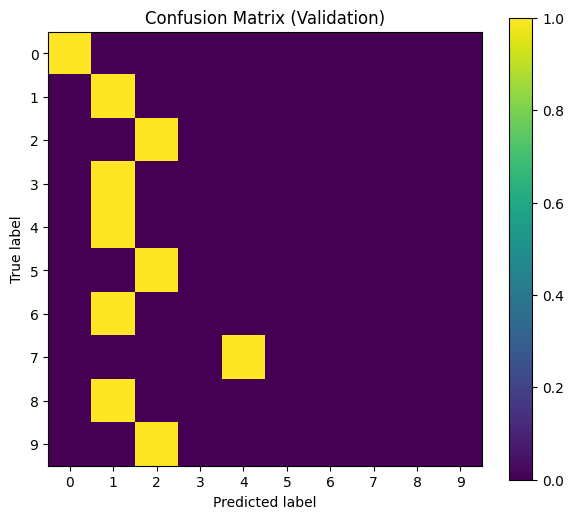

Confusion matrix:
 [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=list(range(10)))

plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
plt.show()

print("Confusion matrix:\n", cm)


In [ ]:
history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

EPOCHS = 20
for epoch in range(EPOCHS):
    tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    va_loss, va_acc = eval_model(model, val_loader, criterion, device)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss)
    history["val_acc"].append(va_acc)

    print(f"Epoch {epoch+1:02d} | Train loss {tr_loss:.4f} acc {tr_acc:.3f} | Val loss {va_loss:.4f} acc {va_acc:.3f}")


Epoch 01 | Train loss 1.6007 acc 0.825 | Val loss 1.9841 acc 0.200
Epoch 02 | Train loss 1.6142 acc 0.850 | Val loss 1.9840 acc 0.400
Epoch 03 | Train loss 1.5364 acc 0.925 | Val loss 1.9706 acc 0.300
Epoch 04 | Train loss 1.4965 acc 0.925 | Val loss 1.9594 acc 0.300
Epoch 05 | Train loss 1.4767 acc 0.975 | Val loss 1.9730 acc 0.300
Epoch 06 | Train loss 1.4942 acc 0.950 | Val loss 1.9701 acc 0.400
Epoch 07 | Train loss 1.4484 acc 0.975 | Val loss 1.9769 acc 0.400
Epoch 08 | Train loss 1.4217 acc 0.975 | Val loss 1.9511 acc 0.400
Epoch 09 | Train loss 1.3816 acc 1.000 | Val loss 1.9091 acc 0.400
Epoch 10 | Train loss 1.3915 acc 0.950 | Val loss 1.9196 acc 0.300
Epoch 11 | Train loss 1.3330 acc 0.950 | Val loss 1.9029 acc 0.300
Epoch 12 | Train loss 1.3268 acc 0.975 | Val loss 1.9194 acc 0.400
Epoch 13 | Train loss 1.2789 acc 1.000 | Val loss 1.9551 acc 0.400
Epoch 14 | Train loss 1.2383 acc 1.000 | Val loss 1.9275 acc 0.400
Epoch 15 | Train loss 1.2617 acc 1.000 | Val loss 1.8971 acc 0

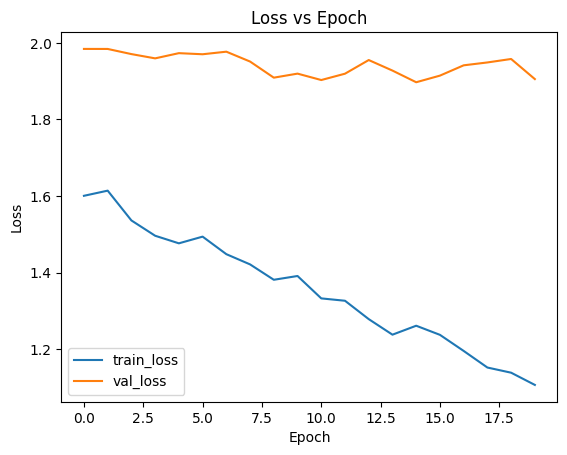

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["val_loss"], label="val_loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


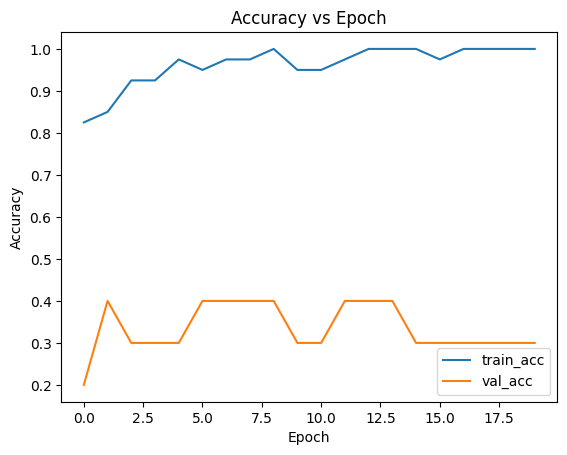

In [ ]:
plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["val_acc"], label="val_acc")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
